# ARIMA MODEL - OPERATIONS MANAGEMENT 
- JESSE TABITHA E
- 222BDA41

In [62]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

DATA PREPARATION

In [63]:
data = pd.read_csv('C:/Users/Lenovo/Downloads/retail_sales_dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



In [64]:
data = data.sort_values(by='Date')

In [65]:
data

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-01-01,522,CUST522,Male,46,Beauty,3,500,1500
2023-01-01,180,CUST180,Male,41,Clothing,3,300,900
2023-01-01,559,CUST559,Female,40,Clothing,4,300,1200
2023-01-02,303,CUST303,Male,19,Electronics,3,30,90
2023-01-02,979,CUST979,Female,19,Beauty,1,25,25
...,...,...,...,...,...,...,...,...
2023-12-29,233,CUST233,Female,51,Beauty,2,300,600
2023-12-29,805,CUST805,Female,30,Beauty,3,500,1500
2023-12-31,857,CUST857,Male,60,Electronics,2,25,50


In [66]:
data.columns

Index(['Transaction ID', 'Customer ID', 'Gender', 'Age', 'Product Category',
       'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

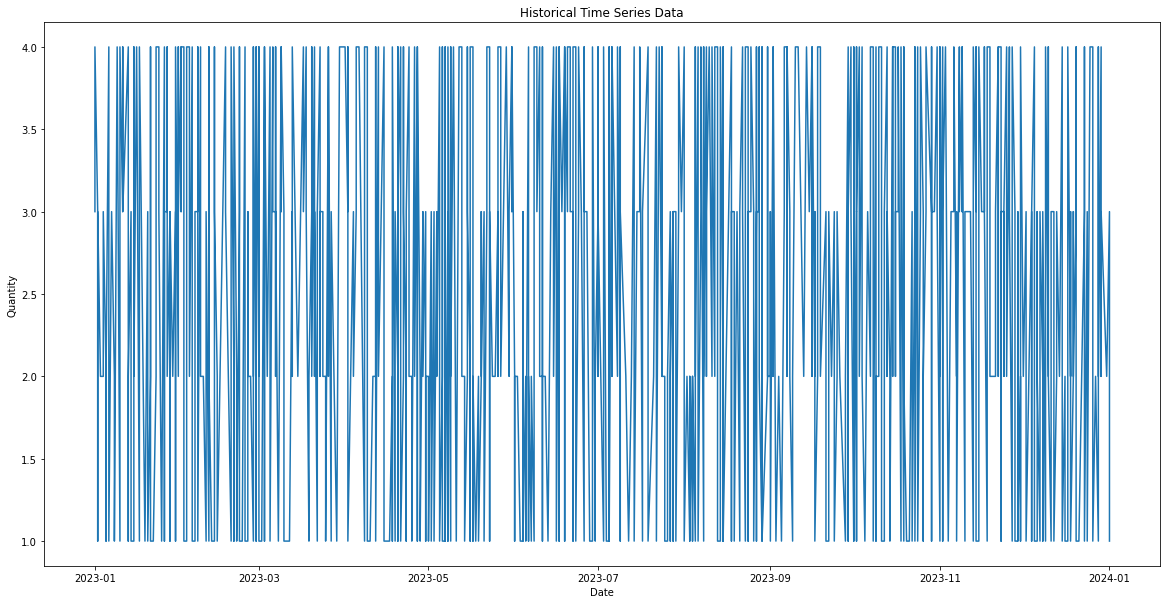

In [67]:
# Visualize the time series data.
plt.figure(figsize=(20, 10))
plt.plot(data['Quantity'])
plt.title('Historical Time Series Data')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()


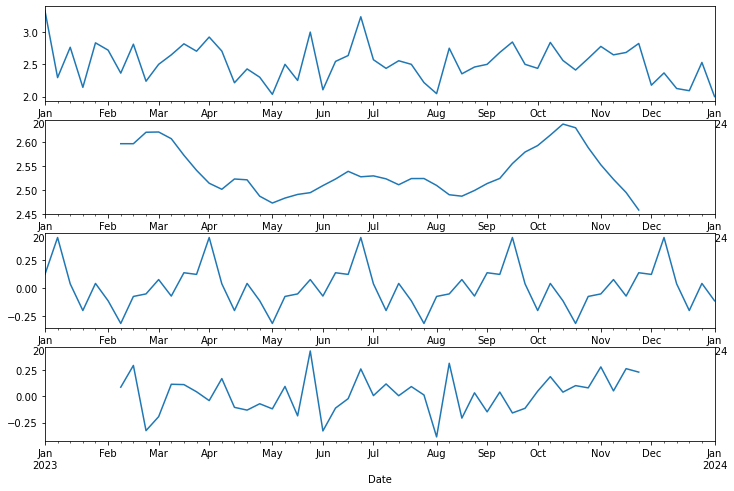

In [69]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame with a DatetimeIndex
data.index = pd.to_datetime(data.index)

# Aggregate the daily data to monthly data
df_weekly = data.resample('W').mean()

# Perform seasonal decomposition on the monthly data
result = sm.tsa.seasonal_decompose(df_weekly['Quantity'], model='additive', period=12)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
result.observed.plot(ax=axes[0])
result.trend.plot(ax=axes[1])
result.seasonal.plot(ax=axes[2])
result.resid.plot(ax=axes[3])
plt.show()


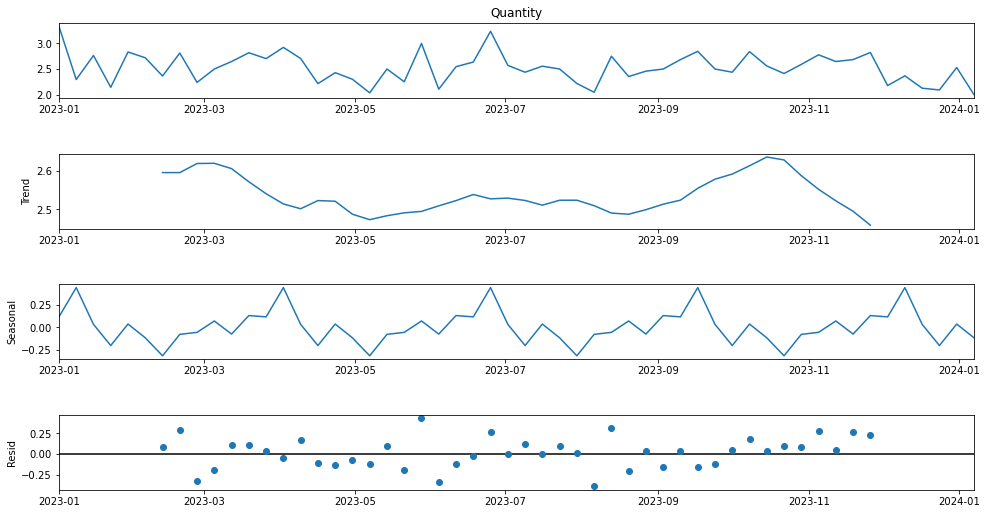

In [70]:
result.plot()
plt.gcf().set_size_inches(16,8)
plt.show()

Text(0, 0.5, 'Quantity')

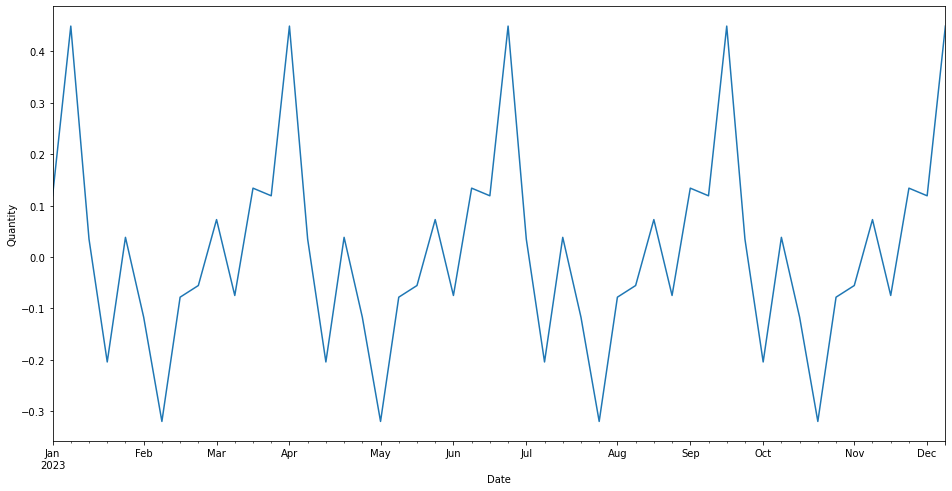

In [73]:
result.seasonal[:50].plot()
plt.gcf().set_size_inches(16,8)
plt.ylabel('Quantity')

After decomposing the dataset, the above plots show that- 
- the trend line fluctuated irregularly and the sales is very inconsistent.
- the seasonal variation shows that, every 9 weeks there is a repetition of pattern.

MODEL IDENTIFICATION

In [74]:
# Check for stationarity using the Augmented Dickey-Fuller (ADF) test.
max_lag = 10 
result = sm.tsa.adfuller(data['Quantity'], maxlag=max_lag)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -31.340049111925687
p-value: 0.0
Critical Values:
   1%: -3.4369127451400474
   5%: -2.864437475834273
   10%: -2.568312754566378


the ADF Statistic is highly negative, and the p-value is very close to zero. This indicates that the series is already stationary and does not require differencing (i.e., d=0).

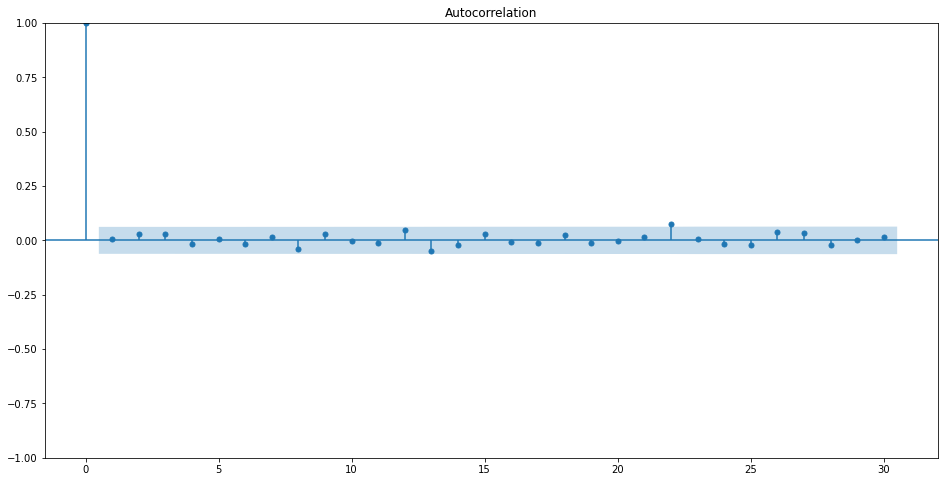

In [75]:
plot_acf(data.Quantity)
plt.gcf().set_size_inches(16,8)
plt.show()

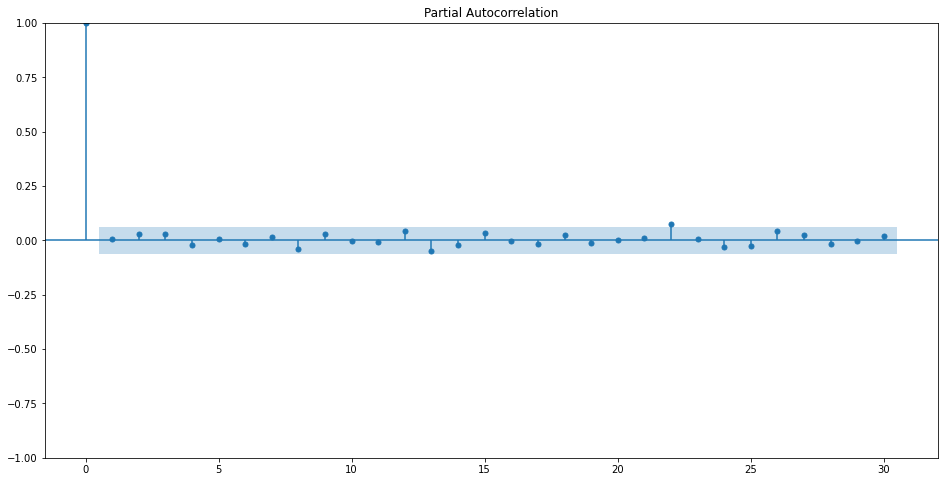

In [76]:
plot_pacf(data.Quantity, method='ywm')
plt.gcf().set_size_inches(16,8)
plt.show()

The order of autoregression (p) and moving average (q) components can be identified by
examining autocorrelation and partial autocorrelation plots (ACF and PACF). In the above graphs we see that p is 22 and q is 22.

MODEL ESTIMATION

In [77]:
#Split the data into training and testing sets.
train_size = int(len(data) * 0.7)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


In [78]:
# Reset the index to integers
data.reset_index(drop=True, inplace=True)

p = 22  # the optimal value for the AR component
d = 0  # the optimal value for differencing
q = 22  # the optimal value for the MA component

# Fit the ARIMA model
model = sm.tsa.ARIMA(train_data['Quantity'], order=(p, d, q))
results = model.fit()
print(results.summary())

C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starti

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  700
Model:               ARIMA(22, 0, 22)   Log Likelihood               -1065.397
Date:                Tue, 31 Oct 2023   AIC                           2222.793
Time:                        20:17:36   BIC                           2432.143
Sample:                             0   HQIC                          2303.719
                                - 700                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5206      0.049     51.942      0.000       2.425       2.616
ar.L1          0.1828      2.515      0.073      0.942      -4.747       5.112
ar.L2          0.2166      1.491      0.145      0.8

In [79]:
# Generate forecasts using integer-based indexing
n_forecast = 200
forecast = results.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean
print(forecast_values)
stderr = forecast.se_mean
conf_int = forecast.conf_int()

700    2.509541
701    2.399140
702    2.313368
703    3.221291
704    2.484549
         ...   
895    2.534731
896    2.509771
897    2.517605
898    2.533919
899    2.517004
Name: predicted_mean, Length: 200, dtype: float64


C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MODEL DIAGNOSTICS and RESIDUAL ANALYSIS

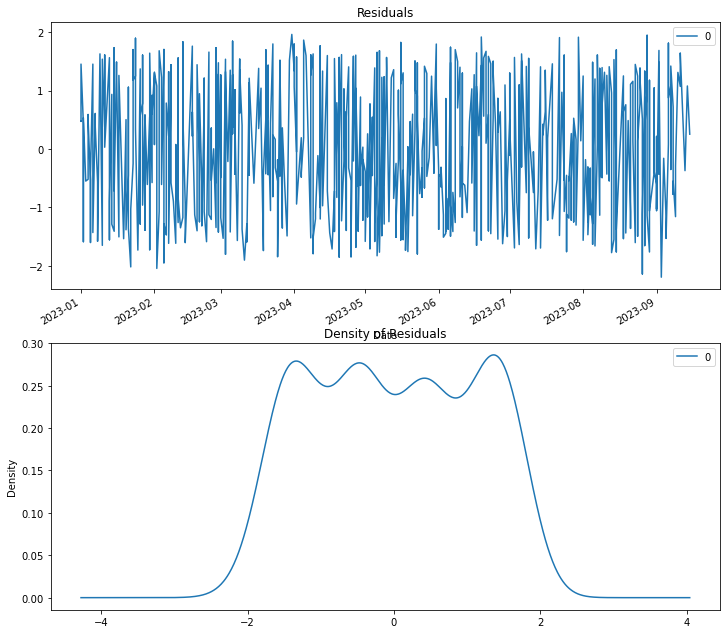

In [22]:
# Plot residual errors
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Plot residual errors
residuals.plot(title='Residuals', ax=ax[0])
ax[0].set_title('Residuals')

# Plot the density of residuals
residuals.plot(kind='kde', title='Density', ax=ax[1])
ax[1].set_title('Density of Residuals')

plt.show()

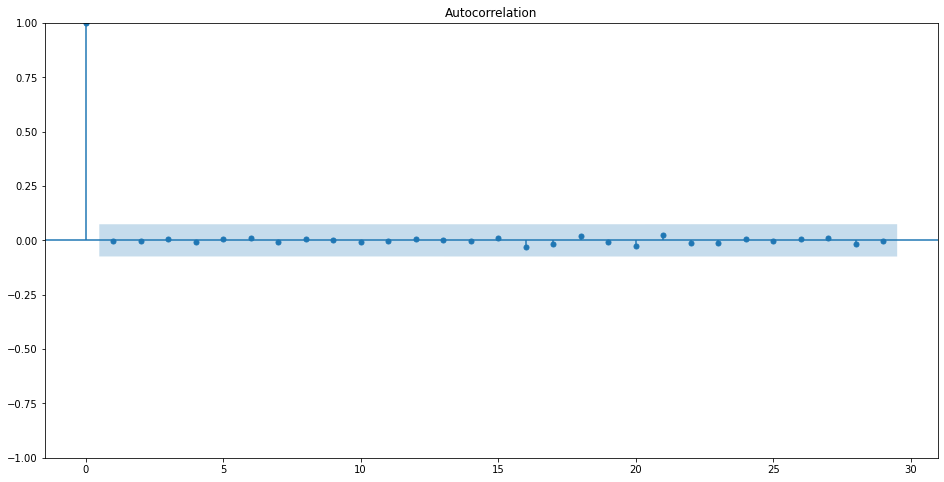

In [23]:
#Plotting ACF for residual
plot_acf(results.resid)
plt.gcf().set_size_inches(16, 8)

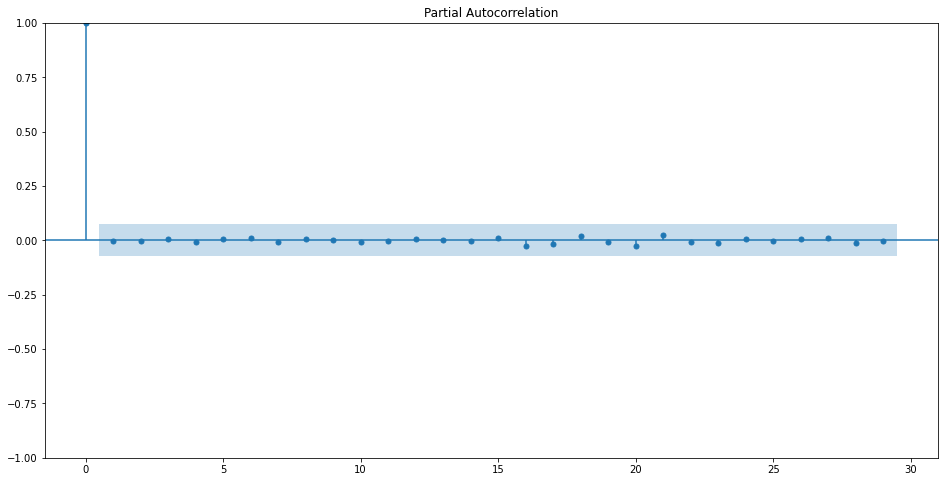

In [24]:
#Plotting ACF for residual
plot_pacf(results.resid, method='ywm')
plt.gcf().set_size_inches(16, 8)

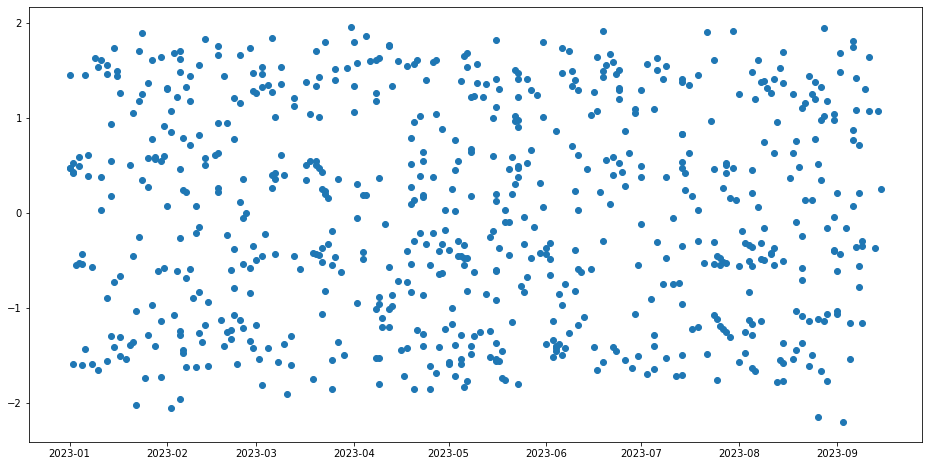

In [25]:
plt.scatter( x = results.resid.index, y = results.resid)
plt.gcf().set_size_inches(16, 8)

From the above ACF, PACF and scatter plots of the residual, we can conclude that the residual is white
noise. It follows no pattern as seen in the scatter plot (evenly distributed) and there are not significant
spikes in both the ACF and PACF plots.

MODEL FORECASTING

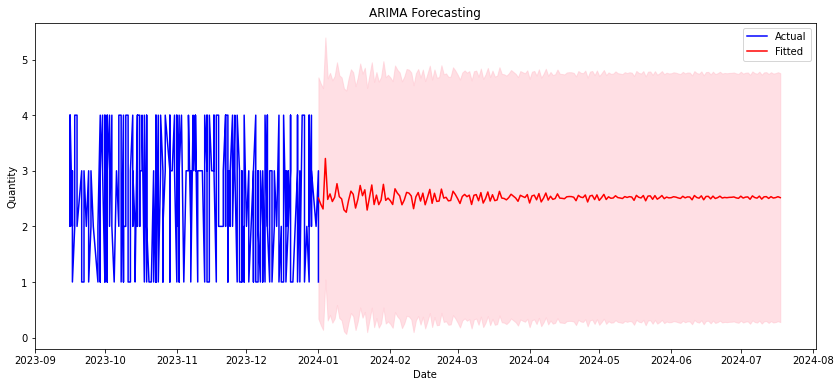

In [83]:
# Assuming that forecast_values and conf_int are already defined from your previous code
plt.figure(figsize=(14, 6))
plt.plot(test_data.index, test_data['Quantity'], label='Actual', color='blue')

# Define forecast_index as the index for the forecasted values
forecast_index = pd.date_range(start=test_data.index[-1], periods=len(forecast_values), freq='D')

plt.plot(forecast_index, forecast_values, label='Fitted', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5)

plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


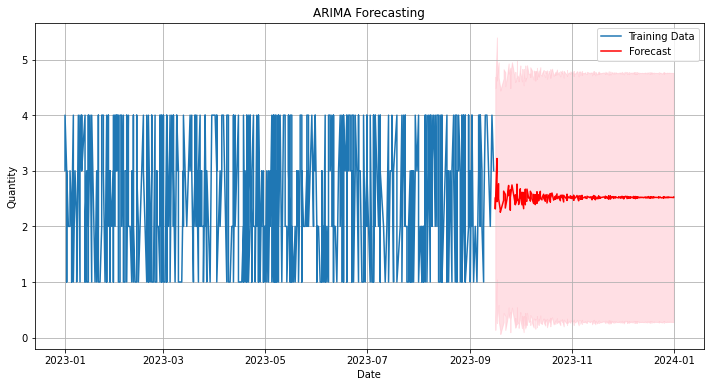

In [84]:
# Create a figure and plot the training data
plt.figure(figsize=(12, 6))
plt.plot(train_data['Quantity'], label='Training Data')

# Use the index of the test data for x-values
forecast_index = test_data.index

# Ensure that forecast_values has the same length as forecast_index
forecast_values = results.get_forecast(steps=len(test_data)).predicted_mean

# Plot the forecasted values
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

# Calculate the confidence intervals
forecast_ci = results.get_forecast(steps=len(test_data)).conf_int()

# Plot the confidence intervals
plt.fill_between(forecast_index, forecast_ci['lower Quantity'], forecast_ci['upper Quantity'], color='pink', alpha=0.5)

plt.title('ARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()



MODEL EVALUATION

In [85]:
# Evaluate the model's performance (you can use various metrics).
from sklearn.metrics import mean_squared_error

In [86]:
mse = mean_squared_error(test_data['Quantity'], forecast_values)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1.254507079090568


The MSE is a measure of the quality of a predictive model, with lower values indicating a better fit. In this case, an MSE of 1.2545 suggests that the model's forecasts have relatively low prediction errors.

In [87]:
steps = 10
forecast = results.get_forecast(steps)  # Get the forecast object
forecast_values = forecast.predicted_mean
stderr_future = forecast.se_mean
conf_int_future = forecast.conf_int()


C:\Users\Lenovo\anaconda3\bin\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [88]:
forecast_values

700    2.509541
701    2.399140
702    2.313368
703    3.221291
704    2.484549
705    2.584162
706    2.446897
707    2.523005
708    2.767957
709    2.534282
Name: predicted_mean, dtype: float64

In [89]:
stderr_future

700    1.107330
701    1.107592
702    1.109131
703    1.110269
704    1.110329
705    1.110817
706    1.111879
707    1.112192
708    1.113284
709    1.113716
Name: var_pred_mean, dtype: float64

In [90]:
conf_int_future

,lower Quantity,upper Quantity
700,0.339215,4.679868
701,0.228299,4.569981
702,0.139511,4.487225
703,1.045204,5.397377
704,0.308344,4.660754
705,0.407000,4.761323
706,0.267654,4.626140
707,0.343150,4.702860
708,0.585960,4.949954
709,0.351438,4.717125
